In [82]:
import pandas as pd

df = pd.read_csv('dataset_hw1.csv', sep = ';')

print(df)

       Score                                               Text  text_length
0          5  Love these tea biscuits. The price was great f...           91
1          4  I'm not a great cook, so we wind up eating a l...         1544
2          5  I'm a fan of coconut so I was happy to see thi...          268
3          5  If you haven't had the 6.4oz Package of Lipton...         1915
4          5  OK, so it takes longer than the instant kind, ...          295
...      ...                                                ...          ...
28418      5  I really love these candy bars. Wispa bars wer...          316
28419      5  My cats love this food. I have been buying the...          359
28420      5  I love all foods flavored with lime, and these...          116
28421      3  I am familiar with Dean Jacobs bread dipping s...          653
28422      5  My cat follows me around and meows constantly ...          197

[28423 rows x 3 columns]


In [83]:
class_column = 'Score'
print(df[class_column].value_counts())

min_size = df[class_column].value_counts().min()
print('min class size =', min_size)

Score
5    18184
4     3967
1     2631
3     2142
2     1499
Name: count, dtype: int64
min class size = 1499


In [84]:
df_downsampled = pd.DataFrame()
for class_type in pd.unique(df[class_column].values):
    sampled_class_df = df[df[class_column] == class_type].sample(min_size, random_state=777)
    df_downsampled = pd.concat([df_downsampled, sampled_class_df], ignore_index=True)
df_downsampled = df_downsampled[df_downsampled[class_column].notnull()]
df_downsampled = df_downsampled[df_downsampled['Text'].notnull()]
print(df_downsampled)
print(df_downsampled[class_column].value_counts())

      Score                                               Text  text_length
0         5  I've been asking people for years if they reme...          714
1         5  As founder of PurrEver Ranch Sanctuary (A Hosp...          592
2         5  Gimborn Freeze Dried Treats 21 oz Beef Liver i...          212
3         5  Absolutely delicious.  And legal for diabetics...          164
4         5  We have never had belly flops before but reall...           93
...     ...                                                ...          ...
7490      3  The product seem to vary quite a bit on qualit...          313
7491      3  I just bought myself a bag of these shrimp chi...          714
7492      3  fancy packaging, but same ol fillers used in m...          365
7493      3  I thought I would like the taste of Soy protei...          438
7494      3  The games reminded me of something that you wo...          344

[7495 rows x 3 columns]
Score
5    1499
4    1499
1    1499
2    1499
3    1499
Name: c

In [85]:
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from minbpe import BasicTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandarallel
pandarallel.pandarallel.initialize(
    progress_bar=True,
)

nltk.download('wordnet')
nltk.download('stopwords')


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ilyasar004/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ilyasar004/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[@#]\w+', '', text)
    text = re.sub(r'\p{P}', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if isinstance(word, str)]

    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens if isinstance(word, str)]

    return ' '.join(tokens)

df_downsampled['processed_text'] = df_downsampled['Text'].parallel_apply(preprocess_text)
whole_text = df_downsampled['processed_text'].sum()
print(len(whole_text))

1939455


In [87]:
# minbpe tokenizers
minbpe_tokenizers = dict()
VOCABULARY_SIZES = [3000, 3500, 4000, 4500, 5000]
for vocabulary_size in VOCABULARY_SIZES:
    tokenizer = BasicTokenizer()
    tokenizer.train(whole_text, vocabulary_size, verbose=True)
    minbpe_tokenizers[vocabulary_size] = tokenizer

merge 1/2744: (116, 32) -> 256 (b't ') had 58385 occurrences
merge 2/2744: (101, 32) -> 257 (b'e ') had 37253 occurrences
merge 3/2744: (114, 32) -> 258 (b'r ') had 30263 occurrences
merge 4/2744: (100, 32) -> 259 (b'd ') had 26868 occurrences
merge 5/2744: (105, 32) -> 260 (b'i ') had 23317 occurrences
merge 6/2744: (110, 32) -> 261 (b'n ') had 21099 occurrences
merge 7/2744: (114, 101) -> 262 (b're') had 21040 occurrences
merge 8/2744: (108, 32) -> 263 (b'l ') had 20318 occurrences
merge 9/2744: (99, 111) -> 264 (b'co') had 16258 occurrences
merge 10/2744: (105, 110) -> 265 (b'in') had 15590 occurrences
merge 11/2744: (101, 258) -> 266 (b'er ') had 15403 occurrences
merge 12/2744: (116, 104) -> 267 (b'th') had 13851 occurrences
merge 13/2744: (101, 97) -> 268 (b'ea') had 13726 occurrences
merge 14/2744: (107, 32) -> 269 (b'k ') had 12186 occurrences
merge 15/2744: (111, 117) -> 270 (b'ou') had 12096 occurrences
merge 16/2744: (116, 97) -> 271 (b'ta') had 11945 occurrences
merge 17/27

0       422 1626 841 611 1833 2782 379 543 1652 935 67...
1       102 2325 373 491 262 374 435 1250 282 99 335 1...
2       103 572 98 280 261 1559 616 641 573 954 1461 2...
3       1401 918 436 377 263 2868 1698 1688 1335 993 1...
4                690 349 1468 102 2452 2453 514 1462 1891
                              ...                        
7490    358 770 118 1429 833 567 769 1858 319 1309 595...
7491    564 1501 104 308 995 710 829 1047 586 317 729 ...
7492    1671 714 552 2295 2565 383 623 514 1262 810 46...
7493    1824 2640 1832 1000 1994 618 1832 1000 677 319...
7494    377 386 1922 720 2658 542 439 476 2135 640 935...
Name: tokenized_text, Length: 7495, dtype: object
(7495, 2771)
-------------------------------------
classification report for vocabulary size 3000
              precision    recall  f1-score   support

           1       0.38      0.50      0.43       300
           2       0.30      0.24      0.27       299
           3       0.32      0.17      0.22       3

0       422 1626 841 611 1833 2782 379 543 1652 935 67...
1       102 2325 373 491 262 374 435 1250 282 99 335 1...
2       103 572 3369 261 3210 641 573 954 1461 2326 35...
3       1401 918 436 377 263 2868 1698 1688 1335 993 1...
4                690 349 1468 102 2452 2453 514 1462 1891
                              ...                        
7490    358 770 3042 833 567 769 1858 319 3031 1131 56...
7491    564 1501 104 308 995 710 829 1047 3095 729 618...
7492    3472 552 2295 2565 383 623 514 1262 810 466 18...
7493    1824 2640 1832 1000 1994 618 1832 1000 677 319...
7494    377 386 1922 720 2658 3368 476 2135 640 935 11...
Name: tokenized_text, Length: 7495, dtype: object
(7495, 3265)
-------------------------------------
classification report for vocabulary size 3500
              precision    recall  f1-score   support

           1       0.39      0.50      0.44       300
           2       0.30      0.21      0.25       299
           3       0.28      0.17      0.21       3

0       422 1626 841 611 1833 2782 379 543 1652 935 67...
1       102 2325 373 491 262 374 435 1250 282 99 335 1...
2       103 572 3369 261 3210 641 573 954 1461 2326 35...
3       1401 918 436 377 263 2868 1698 1688 1335 993 1...
4                690 349 1468 102 2452 2453 514 1462 1891
                              ...                        
7490    358 770 3042 833 567 769 1858 319 3031 1131 56...
7491    564 1501 104 308 995 710 829 1047 3095 729 618...
7492    3472 552 2295 2565 383 623 514 1262 810 466 18...
7493    1824 2640 1832 1000 1994 618 1832 1000 677 319...
7494    377 386 1922 720 2658 3368 476 2135 640 935 11...
Name: tokenized_text, Length: 7495, dtype: object
(7495, 3759)
-------------------------------------
classification report for vocabulary size 4000
              precision    recall  f1-score   support

           1       0.39      0.48      0.43       300
           2       0.36      0.28      0.31       299
           3       0.28      0.16      0.21       3

0       422 1626 841 611 1833 2782 379 543 1652 935 67...
1       102 2325 373 491 262 374 435 1250 282 99 335 1...
2       103 572 3369 261 4034 573 954 1461 2326 4035 8...
3       1401 918 436 4036 2868 1698 1688 1335 993 1652...
4                    690 4037 102 2452 2453 514 1462 1891
                              ...                        
7490    358 770 3042 4332 769 1858 319 3031 1131 567 2...
7491    564 1501 104 4017 710 829 1047 3095 729 618 18...
7492    3472 552 2295 2565 383 623 514 1262 810 466 18...
7493    1824 2640 1832 1000 1994 618 1832 1000 677 319...
7494    377 386 1922 720 2658 3368 476 2135 640 935 11...
Name: tokenized_text, Length: 7495, dtype: object
(7495, 4250)
-------------------------------------
classification report for vocabulary size 4500
              precision    recall  f1-score   support

           1       0.38      0.48      0.42       300
           2       0.30      0.23      0.26       299
           3       0.27      0.16      0.20       3

0       422 1626 841 611 1833 2782 379 4545 4984 383 6...
1       102 2325 373 491 262 374 435 1250 282 99 335 1...
2       103 572 3369 261 4034 573 954 1461 2326 4035 8...
3       1401 918 436 4036 2868 1698 1688 1335 993 1652...
4                    690 4037 102 2452 2453 514 1462 1891
                              ...                        
7490    358 770 3042 4332 769 1858 319 3031 1131 567 2...
7491    564 1501 104 4017 710 829 1047 3095 729 618 18...
7492    3472 552 2295 2565 383 623 514 1262 810 466 18...
7493    1824 2640 1832 1000 1994 618 1832 1000 677 319...
7494    4871 1922 720 2658 3368 476 2135 640 935 4648 ...
Name: tokenized_text, Length: 7495, dtype: object
(7495, 4743)
-------------------------------------
classification report for vocabulary size 5000
              precision    recall  f1-score   support

           1       0.39      0.46      0.42       300
           2       0.31      0.24      0.27       299
           3       0.26      0.19      0.22       3

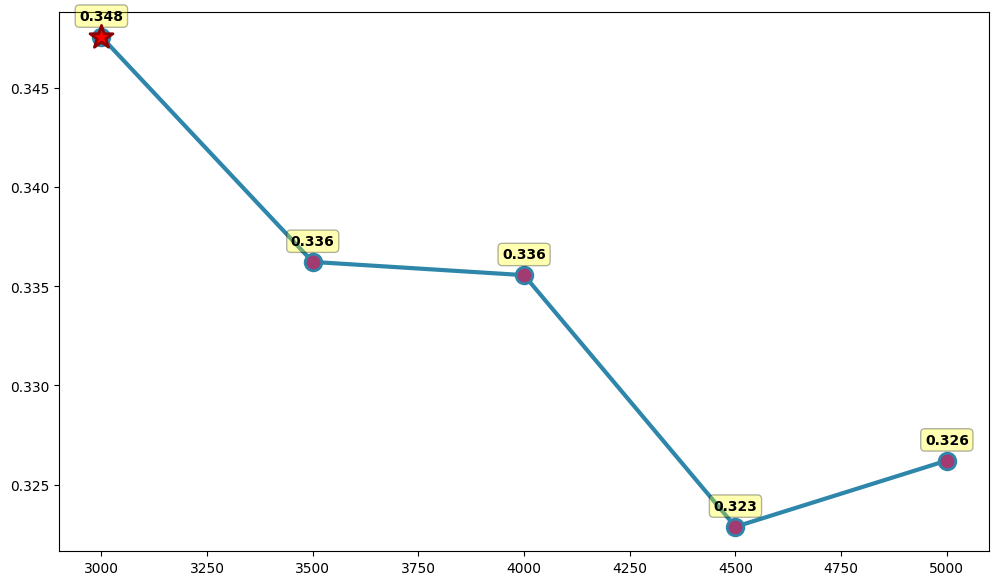

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np

# TFIDF

accuracies = []
for vocabulary_size in VOCABULARY_SIZES:
    def tokenizer_(text):
        tokenizer = minbpe_tokenizers[vocabulary_size]
        tokens = tokenizer.encode(text)
        return ' '.join([str(token) for token in tokens])

    df_downsampled['tokenized_text'] = df_downsampled['processed_text'].parallel_apply(tokenizer_)
    vectorizer = TfidfVectorizer(max_features=10000)
    print(df_downsampled['tokenized_text'])
    data = vectorizer.fit_transform(df_downsampled['tokenized_text']).toarray()
    print(data.shape)

    Y = df_downsampled[class_column].values
    X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, stratify = Y)

    model = GaussianNB()
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    accuracies.append(metrics.accuracy_score(y_test, y_predicted))

    print('-------------------------------------')
    print('classification report for vocabulary size', vocabulary_size)
    print(metrics.classification_report(y_test, y_predicted))
    print('-------------------------------------')
    # create confusion matrix
    print('confusion matrix')
    print(metrics.confusion_matrix(y_test, y_predicted))

plt.figure(figsize=(12, 7))

plt.plot(VOCABULARY_SIZES, accuracies, 
         marker='o', linewidth=3, markersize=12, 
         color='#2E86AB', markerfacecolor='#A23B72',
         markeredgewidth=2, markeredgecolor='#2E86AB')

# Добавляем значения на графике
for vocab_size, accuracy in zip(VOCABULARY_SIZES, accuracies):
    plt.annotate(f'{accuracy:.3f}', 
                xy=(vocab_size, accuracy),
                textcoords="offset points", 
                xytext=(0, 12), 
                ha='center', 
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Находим максимум
best_idx = np.argmax(accuracies)
best_vocab = VOCABULARY_SIZES[best_idx]
best_accuracy = accuracies[best_idx]

# Отмечаем лучшую точку
plt.scatter([best_vocab], [best_accuracy], 
           s=300, c='red', marker='*', 
           edgecolors='darkred', linewidth=2,
           label=f'Лучший результат: vocab={best_vocab}, acc={best_accuracy:.4f}',
           zorder=5)